# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [31]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows



# Normalizing/Scaling Data
#data = normalize(data)

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:
Based on the Read_Me file, I expect 'Fresh' and 'Grocery' play most role( biggest impact) on the first Principle Component Analysis because they have the highest variance among our features and they can show better differentiate  between customer segments.


ICA basically act differently and it shows unrelated and independents features. I expect to see a 6 x 6 matrix with 6 vectors, because we are using all 6 features, and each vector most probably shows a unique cluster of independent items.

###PCA

In [32]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=data.shape[1])
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension


df = pd.DataFrame(pca.components_ ,columns=data.columns).T
df.columns = ["PC-%i"%(n) for n in range(1,7)]
print df
 


variance_ratio = (pd.DataFrame({'Cum_Vari':(pca.explained_variance_ratio_).cumsum(dtype=float)
                    ,'Exp_Vari':pca.explained_variance_ratio_}
                    ,index=xrange(1,7)))
variance_ratio.index.name = 'P_Components'
print '\n',variance_ratio


                      PC-1      PC-2      PC-3      PC-4      PC-5      PC-6
Fresh            -0.976537 -0.110614 -0.178557 -0.041876  0.015986 -0.015763
Milk             -0.121184  0.515802  0.509887 -0.645640  0.203236  0.033492
Grocery          -0.061540  0.764606 -0.275781  0.375460 -0.160292  0.410939
Frozen           -0.152365 -0.018723  0.714200  0.646292  0.220186 -0.013289
Detergents_Paper  0.007054  0.365351 -0.204410  0.149380  0.207930 -0.871284
Delicatessen     -0.068105  0.057079  0.283217 -0.020396 -0.917077 -0.265417

              Cum_Vari  Exp_Vari
P_Components                    
1             0.459614  0.459614
2             0.864786  0.405172
3             0.934816  0.070030
4             0.978839  0.044023
5             0.993862  0.015022
6             1.000000  0.006138


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer:

First and second diminution both have more than 40% variance and both together account more than 86% of the variance in the data.
But after that there is huge drop for second diminution (only 7%), I would say variance drops off after. 

Most Probably I would have chosen 2 or 3. Component one, two are explaining more than 86% of the data. Also we can go a little bit further and consider even component 3. Now these three components are explaining more than 93% of data. But it totally depends on why we are reducing dimensionality.


**3)** What do the dimensions seem to represent? How can you use this information?

Answer:

These number represent correlation of each items (Fresh, Milk, Grocery, …) with components. 

For example the PC-1 is strongly correlated with with Fresh (-0.97). This information tells us first diminution (PC-1) is more talking about Fresh (-0.97) feature and then a little bit about  Frozen (0.15).

PC-2 is is strongly correlated with Grocery(0.76) and milk(0.51). it tells us, this dimentions more shows about Grocery and milk. It also shows if we change one of them, anothe one also will change. It means these two items are a group or cluster.

How can you use this information?
For instance PC-1 shows less demand for Fresh (-0.97) or there is a nice corealation in PC-4 between Milk (-0.64) and Frozen (0.64).We might be able to use this Information to clustering order types.


###ICA

In [44]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

ica = FastICA(n_components = data.shape[1])
ica.fit_transform(data)
# Print the independent components
pd.set_option('display.expand_frame_repr', False)
df = pd.DataFrame(ica.components_,columns=data.columns).T
df.columns = ['ICA-%i'%(n) for n in xrange(1,7)]
print df

                         ICA-1         ICA-2         ICA-3         ICA-4         ICA-5         ICA-6
Fresh             8.651469e-07 -2.987710e-07  1.538329e-07  2.100015e-07 -3.864882e-07 -3.976018e-06
Milk              1.406143e-07  2.314866e-06  9.844350e-06 -1.881081e-06 -2.195433e-07  8.600912e-07
Grocery          -7.739441e-07  1.204060e-05 -5.812865e-06  6.458435e-06 -6.001371e-07  6.299499e-07
Frozen           -1.114622e-05 -1.463912e-06 -3.633293e-07  4.070839e-07 -5.220827e-07  6.769580e-07
Detergents_Paper  5.541871e-07 -2.820254e-05  3.324308e-06 -8.807803e-07  5.096343e-07 -2.073319e-06
Delicatessen      5.952099e-06 -5.730385e-06 -6.056020e-06 -1.469259e-06  1.809235e-05  1.040324e-06


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 


ICA-1: It is more correspond to Frozen (1.114620e-05) feature than other features. 

Fresh            -8.651571e-07,  
Milk             -1.405604e-07,  
Grocery           7.738996e-07,  
Frozen            1.114620e-05,  
Detergents_Paper -5.543345e-07,  
Delicatessen     -5.952081e-06,  



ICA-2: The most valuable value in this ICA is Grocery(-6.448052e-06)

Fresh            :-2.102040e-07,  
Milk              :1.881313e-06,  
Grocery          :-6.448052e-06,  
Frozen           :-4.083602e-07,  
Detergents_Paper  :8.581204e-07,  
Delicatessen      :1.465505e-06,  



ICA-3: The largest absolute value of this IC corresponds to Delicatessen(1.809238e-05). Also it indicates Frozen (-5) and Detergents_Paper(+5) have reverse relationship.

Fresh             :-3.864868e-07,  
Milk              :-2.195676e-07,  
Grocery           :-6.001236e-07,  
Frozen            :-5.221177e-07,  
Detergents_Paper   :5.094260e-07,  
Delicatessen       :1.809238e-05,  



ICA-4: It corresponds to Fresh with (-3.975999e-06), also Grocery (6) and Frozen(6) have same impact.

Fresh             :-3.975999e-06,  
Milk               :8.597850e-07,  
Grocery            :6.290630e-07,  
Frozen             :6.770578e-07,  
Detergents_Paper  :-2.071218e-06,  
Delicatessen       :1.040901e-06,  



ICA-5: It seems it is more correspond to Detergents_Paper(2.820432e-05).

Fresh              :2.989439e-07,  
Milk              :-2.310651e-06,  
Grocery           :-1.204737e-05,  
Frozen             :1.463498e-06,  
Detergents_Paper   :2.820432e-05,  
Delicatessen       :5.729828e-06,  




ICA-6: It corresponds to Milk 9.84

Fresh             :1.536524e-07,  
Milk              :9.845323e-06,  
Grocery           :-5.810466e-06,  
Frozen            :-3.638148e-07,  
Detergents_Paper   :3.316383e-06,  
Delicatessen      :-6.057262e-06,  



 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
These two Models act really like each other. I think only differences between these two models can be about type of prediction. K-Means predicts deterministic (hard) so it is faster, especially when we have small numbers of K. Time complexity for K-Means is normally O (n^2 log n), Whereas Gaussian Mixture predicts more probabilistic (Soft). So it makes less mistake in comparison with k-Means in cases data points are near decision boundary.

I want to use K-Means because it is deterministic and we don’t need to deal with probability at this point. Because we don’t know after how much certainty we can assign a data point to a cluster.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [34]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [35]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [36]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters=[]
for c in xrange(2,6):
    clusters.append(KMeans(n_clusters=c,max_iter=500,n_jobs=2).fit(reduced_data))
    print "%d Clusters: "%c ,clusters[-1],'\n\n'
    

2 Clusters:  KMeans(copy_x=True, init='k-means++', max_iter=500, n_clusters=2, n_init=10,
    n_jobs=2, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0) 


3 Clusters:  KMeans(copy_x=True, init='k-means++', max_iter=500, n_clusters=3, n_init=10,
    n_jobs=2, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0) 


4 Clusters:  KMeans(copy_x=True, init='k-means++', max_iter=500, n_clusters=4, n_init=10,
    n_jobs=2, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0) 


5 Clusters:  KMeans(copy_x=True, init='k-means++', max_iter=500, n_clusters=5, n_init=10,
    n_jobs=2, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0) 




In [37]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z=[]
for x in range(4):
    Z.append(clusters[x].predict(np.c_[xx.ravel(), yy.ravel()]))

In [38]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = []
for x in range(4):
    centroids.append(clusters[x].cluster_centers_)
    print "%d clusters: "%(x+2), '\n',centroids[x],'\n\n'

2 clusters:  
[[  4175.31101293   -211.15109304]
 [-24088.33276689   1218.17938291]] 


3 clusters:  
[[-23978.86566553  -4445.56611772]
 [  1341.31124554  25261.39189714]
 [  4165.1217824   -3105.15811456]] 


4 clusters:  
[[  5548.08065188  13471.89133937]
 [  3651.92685912  -4691.85143582]
 [-24220.71188261  -4364.45560022]
 [-14537.71774395  61715.67085248]] 


5 clusters:  
[[  5607.91709853  14199.18040025]
 [-37090.26267941  -5656.14400877]
 [-14537.71774395  61715.67085248]
 [ -8916.05497932  -4762.41444628]
 [  6399.7117556   -4169.29690862]] 




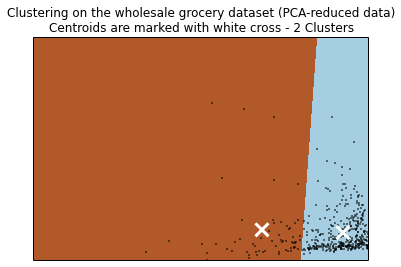

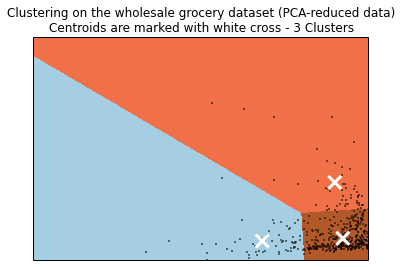

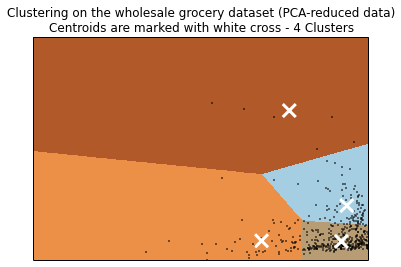

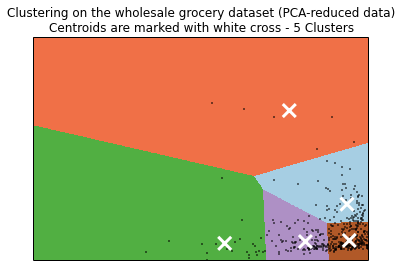

In [39]:
# Put the result into a color plot

for x in range(4):
    Z[x] = Z[x].reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z[x], interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[x][:, 0], centroids[x][:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross - %d Clusters ' % (x+2))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

In [40]:
df = pd.DataFrame(pca.inverse_transform(centroids[1]),columns=data.columns).T
df.columns=  ['Cluster-%i'% x for x in xrange(1,4)]
print df


                     Cluster-1     Cluster-2    Cluster-3
Fresh             35908.284778   7896.197899  8276.376354
Milk               6409.089865  18663.600824  3689.872237
Grocery            6027.837853  27183.753989  5320.730320
Frozen             6808.698912   2394.582917  2495.453910
Detergents_Paper   1088.151133  12120.223815  1776.402789
Delicatessen       2904.194737   2875.421215  1063.966060


Answer:

To answer this question I had to revert back centroids to actual value. I think 3 Clusters are the best for this model. 

Cluster-1 describes those customers who spend or order a lot of Grocery items because it has biggest number in this vector and then Milk, Detergents_Paperbut are next, but they spend so much less on Delicatessen, Frozen and Fresh in comparison with Milk because these three have lowest number ic Cluster-1

Cluster-2 describes those types of customers who spend more on Fresh and Grocery in comarison with Delicatessen and Detergents_Paper. 

Cluster-3 describes those customers who spend a lot on Fresh because it is too high and also they spend same money on Milk, Grocery and Frozen and only a little on Detergents_Paper and Delicatessen

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

I think PCA gave me most insight into the data; it lets you to see data's dimensionality and lets you to reduce it efficiently. Also you can see which features are playing most roles on each component.After PCA I would say ICA was helpful, but not as much as PCA.

KMeans and plotting gave me a good understanding of my clusters and data. but if I have to chose only one I would definitely say PCA.

**9)** How would you use that technique to help the company design new experiments?

Answer: 

I think this clustering can help company to introduce each strategy only for some part of its customers not all of them. I mean you can have a better understanding of your customer requirements with PCA and clustering, so you can make a new customized strategy for each group of your customer to get a better result.

We can chose few customers from each cluster and then apply our new strategy on each group_test and then evaluate our result. After certain time we can realize for which clusters the new strategy is useful.

**10)** How would you use that data to help you predict future customer needs?

Answer: 

We can assign a label to each cluster(i.e. each data point inside that cluster) and then run any types of supervised learning algorithm. 
It really can be helpful to categorize online customers or new customers based on their first porches, in order to make a new suggestion to them.

Because we know they are belong to which group and what they are exactly looking for and what should we suggest to them. For example based on cluster-3 we know whoever spends a lot of money on Fresh most probably spends same amount of money on Milk, Grocery and Frozen.